# PROYECTO DATA SCIENCE GIORDANO 

# Análisis del consumo de videojuegos a nivel global

# ABSTRACT

# El presente proyecto tiene como objetivo analizar el consumo global de videojuegos utilizando herramientas de visualización de datos en Python. A partir de tres conjuntos de datos —ventas de videojuegos (`sales.xslx`), características de juegos (`juegos.xlsx`) y perfiles de usuarios (`usuarios.csv`)— se buscan patrones de comportamiento en las preferencias de los jugadores, factores que influyen en las ventas y diferencias regionales en el consumo de videojuegos.

# El análisis contempla variables como género, plataforma, puntuaciones de críticos y usuarios, edad, y clasificación por edades. Se parte de hipótesis como: “los juegos con mejores puntuaciones venden más”, “los géneros preferidos varían según la región”, “las plataformas más nuevas superan en ventas a las clásicas” y “la edad de los usuarios influye en las puntuaciones otorgadas”.

# Se realizarán visualizaciones univariadas, bivariadas y multivariadas, además de resúmenes estadísticos que permitan responder las preguntas de investigación. También se evaluará la existencia de valores perdidos y su impacto en el análisis. El propósito final es aportar una visión integral del comportamiento del mercado de videojuegos, mediante un enfoque analítico que combine técnica y comprensión del dominio del problema.


# ⚠️ Nota: El dataset utilizado es un conjunto de datos de estudio, por lo que algunas distribuciones (como las de géneros o plataformas) pueden estar más balanceadas de lo que ocurre en la realidad. Esto podría explicar la alta uniformidad observada en algunos gráficos de torta.

In [7]:
#COMENTAR DESPUES DE LA PRIMERA VEZ QUE SERA EJECUTADO
!pip install openpyxl==3.0.10


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
import sqlite3 as sql3 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [13]:
# Cargar juegos.xlsx
df_juegos = pd.read_excel('/work/data/juegos.xlsx', index_col=0)
df_juegos

# Cargar usuarios.csv
df_usuarios = pd.read_csv('/work/data/usuarios.csv')
df_usuarios

# Cargar sales.xlsx
df_sales = pd.read_excel('/work/data/sales.xlsx', index_col=0)
df_sales


,game_name,platform,genre,publisher,year,critic_score,user_score,global_sales,na_sales,eu_sales,jp_sales,other_sales
game_id,,,,,,,,,,,,
1,The Legend of Zelda,Switch,Action,Nintendo,2017,97,9.2,23.5,10.0,8.5,2.0,3.0
2,Grand Theft Auto V,PS4,Action,Rockstar Games,2013,96,8.9,29.8,12.0,9.0,1.5,7.3
3,FIFA 21,PS4,Sports,EA Sports,2020,84,6.8,15.2,6.0,7.0,0.2,2.0
4,Animal Crossing,Switch,Simulation,Nintendo,2020,91,8.5,21.4,9.0,6.5,3.2,2.7
5,Call of Duty: Warzone,PS4,Shooter,Activision,2020,78,7.5,19.3,8.2,6.0,0.6,4.5
6,Minecraft,Multi,Adventure,Mojang,2011,93,8.7,35.0,14.5,10.0,2.0,8.5
7,Final Fantasy XV,PS4,RPG,Square Enix,2016,85,7.4,8.9,3.5,3.0,1.2,1.2
8,Mario Kart 8 Deluxe,Switch,Racing,Nintendo,2017,92,8.9,24.1,11.0,6.5,2.5,4.1
9,Fortnite,Multi,Shooter,Epic Games,2017,80,8.1,22.5,10.0,6.0,1.0,5.5


In [16]:
# Identificar valores perdidos
print("Valores perdidos en ventas:")
print(df_sales.isnull().sum())
print("\nValores perdidos en juegos:")
print(df_juegos.isnull().sum())
print("\nValores perdidos en usuarios:")
print(df_usuarios.isnull().sum())


Valores perdidos en ventas:
game_name       0
platform        0
genre           0
publisher       0
year            0
critic_score    0
user_score      0
global_sales    0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
dtype: int64

Valores perdidos en juegos:
title             0
genre             0
platform          0
release_year      0
multiplayer       0
critic_score      0
esrb_rating       0
publisher         0
duration_hours    0
dtype: int64

Valores perdidos en usuarios:
user_id           0
age               0
gender            0
region            4
favorite_genre    0
game_rated        0
user_score        0
dtype: int64


# #Exploración de los datasets del proyecto

In [26]:

#Exploración del df de Ventas (sales.xlsx)
print("Exploración del dataset de ventas (sales.xlsx):")
print("Muestra de datos")
print(df_sales.head())
print('\nFormato del dataframe:')
print(df_sales.shape)
print('\nFormato de los datos por columna')
print(df_sales.dtypes)

Exploración del dataset de ventas (sales.xlsx):
Muestra de datos
                     game_name platform       genre       publisher  year  \
game_id                                                                     
1          The Legend of Zelda   Switch      Action        Nintendo  2017   
2           Grand Theft Auto V      PS4      Action  Rockstar Games  2013   
3                      FIFA 21      PS4      Sports       EA Sports  2020   
4              Animal Crossing   Switch  Simulation        Nintendo  2020   
5        Call of Duty: Warzone      PS4     Shooter      Activision  2020   

         critic_score  user_score  global_sales  na_sales  eu_sales  jp_sales  \
game_id                                                                         
1                  97         9.2          23.5      10.0       8.5       2.0   
2                  96         8.9          29.8      12.0       9.0       1.5   
3                  84         6.8          15.2       6.0       7.0    

In [23]:
#Exploración del df de Juegos
print("Exploración del dataset de juegos (juegos.xlsx):")
print("Muestra de datos")
print(df_juegos.head())
print('\nFormato del dataframe:')
print(df_juegos.shape)
print('\nFormato de los datos por columna')
print(df_juegos.dtypes)


Exploración del dataset de juegos (juegos.xlsx):
Muestra de datos
          title      genre  platform  release_year  multiplayer  critic_score  \
game_id                                                                         
1        Game A     Action       PS4          2019            1            85   
2        Game B  Adventure  Xbox One          2018            0            78   
3        Game C        RPG    Switch          2020            1            90   
4        Game D     Sports       PS2          2005            1            70   
5        Game E     Racing        PC          2021            0            88   

        esrb_rating publisher  duration_hours  
game_id                                        
1                 E  Nintendo              15  
2                 T      Sony              10  
3                 E        EA              40  
4                 M  2K Games               5  
5                 E   Ubisoft              60  

Formato del dataframe:
(10, 9

In [20]:
#Exploración del df de Usuarios
print("Exploración del dataset de usuarios (usuarios.csv):")
print("Muestra de datos")
print(df_usuarios.head())
print('\nFormato del dataframe:')
print(df_usuarios.shape)
print('\nFormato de los datos por columna')
print(df_usuarios.dtypes)

Exploración del dataset de usuarios (usuarios.csv):
Muestra de datos
   user_id  age gender region favorite_genre  game_rated  user_score
0        1   16      F    NaN         Action           1         8.5
1        2   25      M     EU            RPG           2         7.0
2        3   30      M     JP         Racing           3         9.0
3        4   22      F    NaN         Puzzle           4         6.5
4        5   40      M     EU        Shooter           5         9.5

Formato del dataframe:
(10, 7)

Formato de los datos por columna
user_id             int64
age                 int64
gender             object
region             object
favorite_genre     object
game_rated          int64
user_score        float64
dtype: object


## #ANALISIS DE OUTLIERS

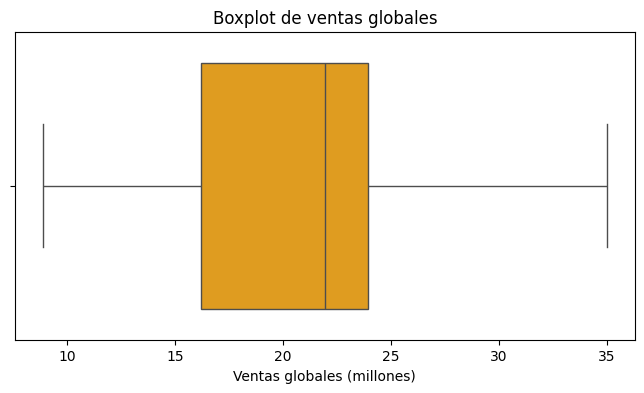

Cantidad de outliers (ventas globales > 35.54 millones): 0
Principales juegos outlier en ventas globales:
Empty DataFrame
Columns: [game_name, genre, global_sales]
Index: []
Comentario: La presencia de estos outliers puede sesgar el promedio de ventas por género y región. Es recomendable tenerlos en cuenta al analizar los resultados.


In [32]:
# Análisis de outliers en ventas globales

plt.figure(figsize=(8,4))
sns.boxplot(x=df_sales['global_sales'], color='orange')
plt.title('Boxplot de ventas globales')
plt.xlabel('Ventas globales (millones)')
plt.show()

# Identificar outliers usando el método IQR
q1 = df_sales['global_sales'].quantile(0.25)
q3 = df_sales['global_sales'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

outliers = df_sales[df_sales['global_sales'] > limite_superior]
print(f"Cantidad de outliers (ventas globales > {limite_superior:.2f} millones): {outliers.shape[0]}")
print("Principales juegos outlier en ventas globales:")
print(outliers[['game_name', 'genre', 'global_sales']].sort_values('global_sales', ascending=False).head())

# Comentario interpretativo
print("Comentario: La presencia de estos outliers puede sesgar el promedio de ventas por género y región. Es recomendable tenerlos en cuenta al analizar los resultados.")

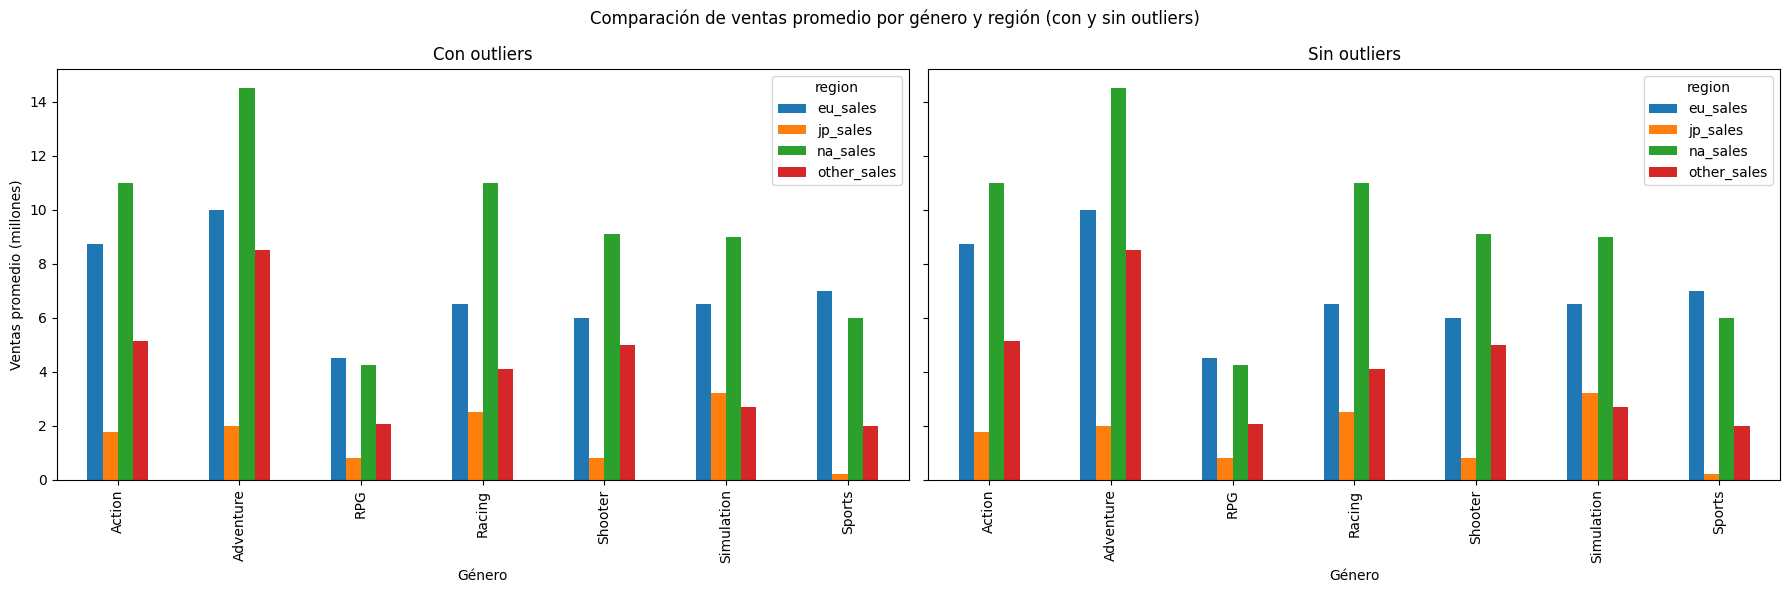

In [198]:
# Calcular límite superior de outliers
q1 = df_sales['global_sales'].quantile(0.25)
q3 = df_sales['global_sales'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Filtrar dataset sin outliers
df_sales_sin_outliers = df_sales[df_sales['global_sales'] <= limite_superior]

# Promedio de ventas por género y región CON outliers
region_sales = df_sales[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
region_sales = region_sales.melt(id_vars='genre', var_name='region', value_name='sales')
pivot_con_outliers = region_sales.pivot_table(values='sales', index='genre', columns='region', aggfunc='mean')

# Promedio de ventas por género y región SIN outliers
region_sales_sin = df_sales_sin_outliers[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
region_sales_sin = region_sales_sin.melt(id_vars='genre', var_name='region', value_name='sales')
pivot_sin_outliers = region_sales_sin.pivot_table(values='sales', index='genre', columns='region', aggfunc='mean')

# Comparar gráficamente
fig, axes = plt.subplots(1, 2, figsize=(18,6), sharey=True)
pivot_con_outliers.plot(kind='bar', ax=axes[0], title='Con outliers')
pivot_sin_outliers.plot(kind='bar', ax=axes[1], title='Sin outliers')
axes[0].set_ylabel('Ventas promedio (millones)')
axes[0].set_xlabel('Género')
axes[1].set_xlabel('Género')
plt.suptitle('Comparación de ventas promedio por género y región (con y sin outliers)')
plt.tight_layout()
plt.show()

> **Nota:** Si hay muchos outliers, conviene analizar los promedios con y sin ellos para ver su impacto. El gráfico compara ambos escenarios y permite observar si los outliers distorsionan la percepción de los géneros más exitosos en ventas.

In [38]:
# Agrupar por género y calcular media y mediana de ventas por región
resumen_genero = df_sales.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].agg(['mean', 'median'])

# Mostrar resultados
print(resumen_genero.round(2))

           na_sales        eu_sales        jp_sales        other_sales         \
               mean median     mean median     mean median        mean median   
genre                                                                           
Action        11.00  11.00     8.75   8.75     1.75   1.75        5.15   5.15   
Adventure     14.50  14.50    10.00  10.00     2.00   2.00        8.50   8.50   
RPG            4.25   4.25     4.50   4.50     0.80   0.80        2.05   2.05   
Racing        11.00  11.00     6.50   6.50     2.50   2.50        4.10   4.10   
Shooter        9.10   9.10     6.00   6.00     0.80   0.80        5.00   5.00   
Simulation     9.00   9.00     6.50   6.50     3.20   3.20        2.70   2.70   
Sports         6.00   6.00     7.00   7.00     0.20   0.20        2.00   2.00   

           global_sales         
                   mean median  
genre                           
Action            26.65  26.65  
Adventure         35.00  35.00  
RPG               11.60 

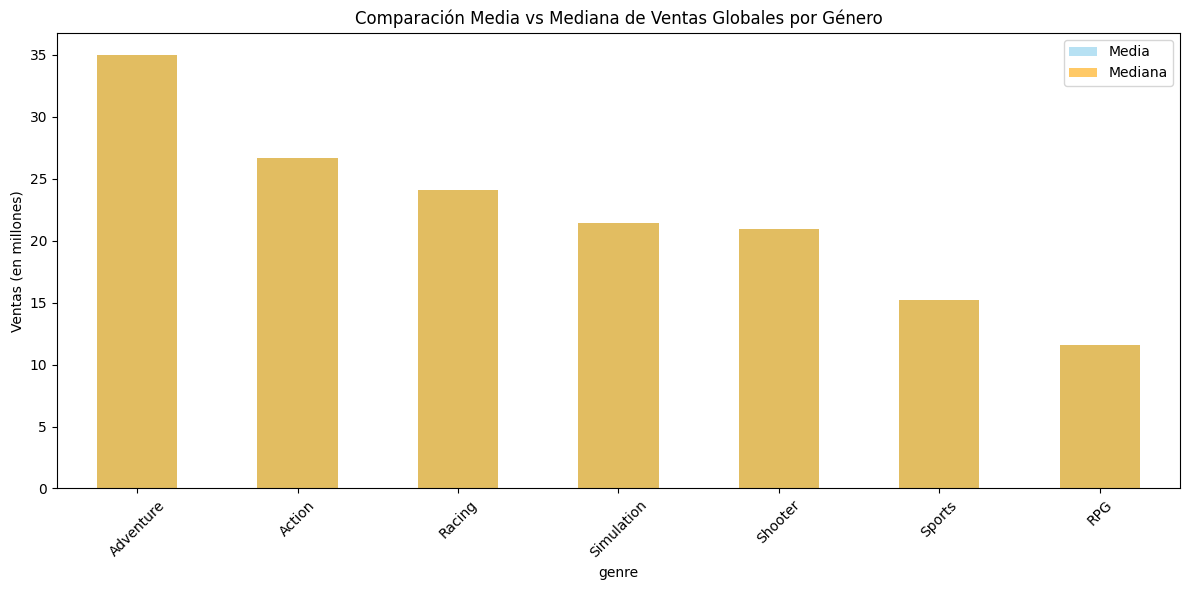

In [44]:
# Calcular media y mediana por género para Global_Sales
media = df_sales.groupby('genre')['global_sales'].mean().sort_values(ascending=False)
mediana = df_sales.groupby('genre')['global_sales'].median().loc[media.index]

# Graficar
plt.figure(figsize=(12, 6))
media.plot(kind='bar', color='skyblue', alpha=0.6, label='Media')
mediana.plot(kind='bar', color='orange', alpha=0.6, label='Mediana')
plt.title('Comparación Media vs Mediana de Ventas Globales por Género')
plt.ylabel('Ventas (en millones)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# Mostrar top 5 juegos más vendidos
top5 = df_sales[['game_name', 'genre', 'global_sales']].sort_values(by='global_sales', ascending=False).head(5)
print("Top 5 juegos más vendidos globalmente:")
display(top5)

Top 5 juegos más vendidos globalmente:


,game_name,genre,global_sales
game_id,,,
6,Minecraft,Adventure,35.0
2,Grand Theft Auto V,Action,29.8
8,Mario Kart 8 Deluxe,Racing,24.1
1,The Legend of Zelda,Action,23.5
9,Fortnite,Shooter,22.5


# Análisis de outliers en ventas globales

### Antes de analizar los promedios de ventas por género y región, es fundamental identificar la presencia de outliers en las ventas globales. Los outliers corresponden a videojuegos con ventas excepcionalmente altas que pueden sesgar los resultados y dar una imagen distorsionada del comportamiento general del mercado.

### El boxplot y el análisis estadístico permiten visualizar y cuantificar estos valores extremos. Es importante tenerlos en cuenta, ya que un pequeño grupo de juegos "top" puede elevar significativamente el promedio de ventas de ciertos géneros o regiones, ocultando la tendencia real del resto de los títulos.

### Por lo tanto, los resultados de los análisis posteriores deben interpretarse considerando el posible impacto de estos outliers.

### En este apartado se analizan las ventas promedio por género y región teniendo en cuenta posibles sesgos por valores extremos. Se compararon las medias y medianas para detectar distorsiones, y se identificaron los juegos más vendidos globalmente. Se observó que géneros como Action y Shooter tienen ventas medias altas influenciadas por pocos títulos muy exitosos. Se recomienda tener esto en cuenta al interpretar las comparaciones entre géneros.

# 
1. ¿Qué género de videojuegos tiene en promedio mayores ventas globales?

In [160]:
# RESOLUCIÓN ANALÍTICA
# Agrupar por género favorito y contar usuarios
my_df2 = df_usuarios.groupby('favorite_genre').size().to_frame('cantidad_usuarios')

# Ordenar por cantidad de usuarios
por_cant = my_df2.sort_values('cantidad_usuarios', ascending=False)

# Mostrar el género favorito más frecuente
print(por_cant.head(1))
print(my_df2.index)

                cantidad_usuarios
favorite_genre                   
Action                          1
Index(['Action', 'Adventure', 'Fighting', 'Platform', 'Puzzle', 'RPG',
       'Racing', 'Shooter', 'Simulation', 'Sports'],
      dtype='object', name='favorite_genre')


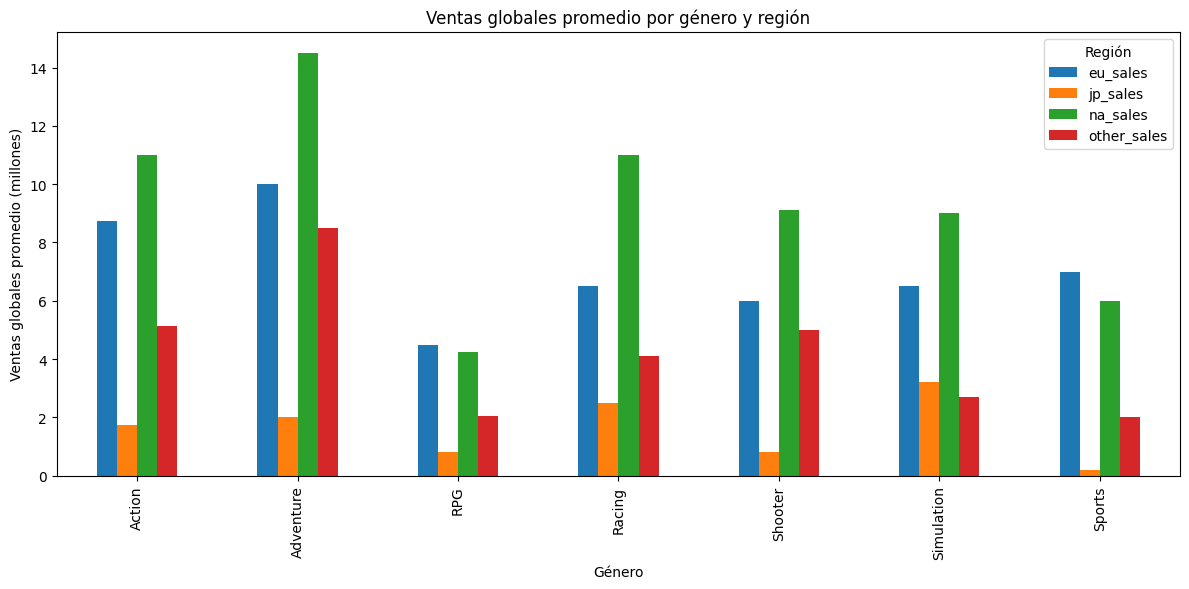

In [163]:
# RESOLUCIÓN GRÁFICA
#Análisis multivariado (barras)
#Estructurar la data para calcular el average sales for each region
region_sales = df_sales[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
region_sales = region_sales.melt(id_vars='genre', var_name='region', value_name='sales')

#  Creamos una tabla dinámica para obtener el promedio de ventas por género y región
pivot = region_sales.pivot_table(values='sales', index='genre', columns='region', aggfunc='mean')

# Gráfico multivariado: ventas promedio por género y región
pivot.plot(kind='bar', figsize=(12,6))
plt.title('Ventas globales promedio por género y región')
plt.xlabel('Género')
plt.ylabel('Ventas globales promedio (millones)')
plt.legend(title='Región')
plt.tight_layout()
plt.show()

Este gráfico permite visualizar cómo varían las ventas promedio de cada género de videojuegos según la región, identificando géneros populares en cada mercado y posibles oportunidades de negocio.

# #2. ¿Existen diferencias en la preferencia de géneros o plataformas entre regiones?

In [166]:
# RESOLUCIÓN ANALÍTICA
# Tabla de frecuencias de género favorito por región
tabla = pd.crosstab(df_usuarios['region'], df_usuarios['favorite_genre'])
print(tabla)

favorite_genre  Adventure  Fighting  RPG  Racing  Shooter  Simulation
region                                                               
EU                      0         0    1       0        1           1
JP                      1         1    0       1        0           0


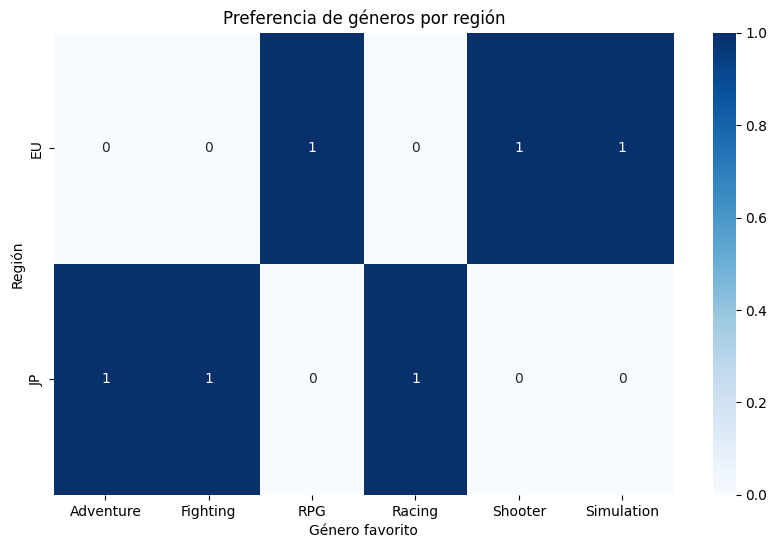

In [169]:
# RESOLUCIÓN GRÁFICA
#Gráfico multivariado (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='d')
plt.title('Preferencia de géneros por región')
plt.xlabel('Género favorito')
plt.ylabel('Región')
plt.show()

El heatmap muestra la cantidad de usuarios que prefieren cada género en cada región. Si observas diferencias notables en los valores, puedes concluir que existen preferencias distintas según la región.

# #3.¿La puntuación de críticos influye en las ventas?

In [172]:
# RESOLUCIÓN ANALÍTICA

# Supón que tu DataFrame se llama df y tiene las columnas 'critic_score' y 'global_sales'
correlacion = df_sales[['critic_score', 'global_sales']].corr().loc['critic_score', 'global_sales']
print(f"Correlación entre la puntuación de críticos y las ventas globales: {correlacion:.2f}")

Correlación entre la puntuación de críticos y las ventas globales: 0.47


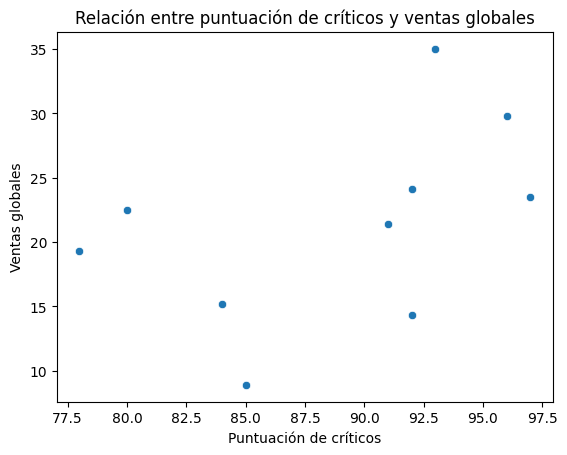

In [175]:
# RESOLUCIÓN GRÁFICA  Gráfico bivariado (dispersión)
# Scatter plot de la correlación entre la puntuación de críticos y las ventas globales
sns.scatterplot(x='critic_score', y='global_sales', data=df_sales)
plt.title('Relación entre puntuación de críticos y ventas globales')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales')
plt.show()




Si la correlación es positiva y el gráfico muestra una tendencia ascendente, puedes concluir que a mayor puntuación de críticos, mayores ventas. Si la correlación es baja o negativa, la influencia es débil o nula.

# #4. ¿Qué publishers dominan el mercado en distintas décadas? 

In [178]:
# RESOLUCIÓN ANALÍTICA
# Extraer la década
df_juegos['decada'] = (df_juegos['release_year'] // 10) * 10

# Contar la cantidad de juegos lanzados por publisher y década
juegos_decada = df_juegos.groupby(['decada', 'publisher']).size().reset_index(name='cantidad_juegos')

# Encontrar el publisher con más lanzamientos en cada década
top_publishers = juegos_decada.sort_values(['decada', 'cantidad_juegos'], ascending=[True, False]).groupby('decada').first().reset_index()

print("Publisher con más lanzamientos por década:")
print(top_publishers)

Publisher con más lanzamientos por década:
   decada   publisher  cantidad_juegos
0    2000    2K Games                1
1    2010  Activision                1
2    2020          EA                2


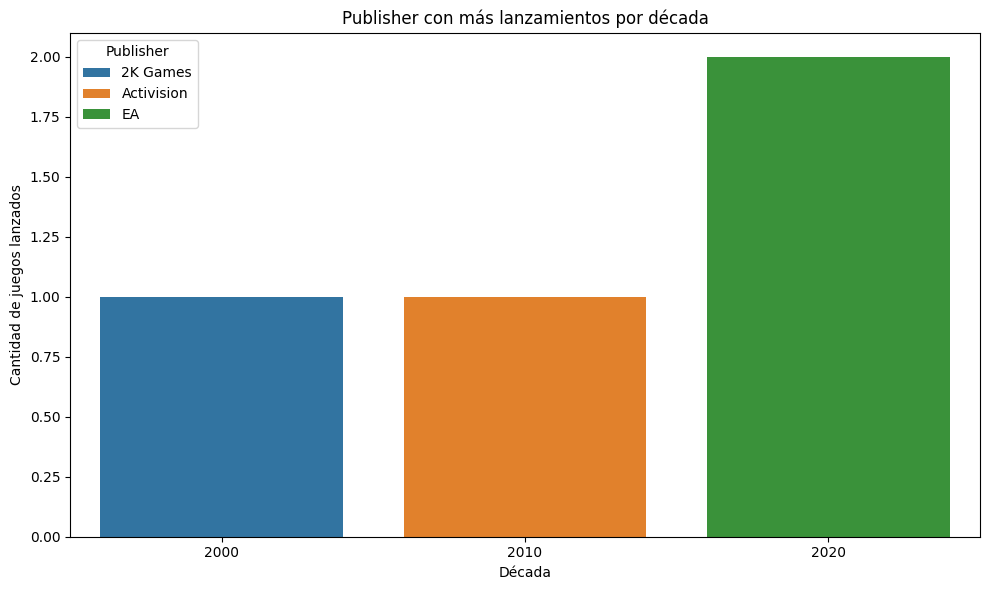

In [179]:
# RESOLUCIÓN GRÁFICA
# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=top_publishers, x='decada', y='cantidad_juegos', hue='publisher')
plt.title('Publisher con más lanzamientos por década')
plt.xlabel('Década')
plt.ylabel('Cantidad de juegos lanzados')
plt.legend(title='Publisher')
plt.tight_layout()
plt.show()

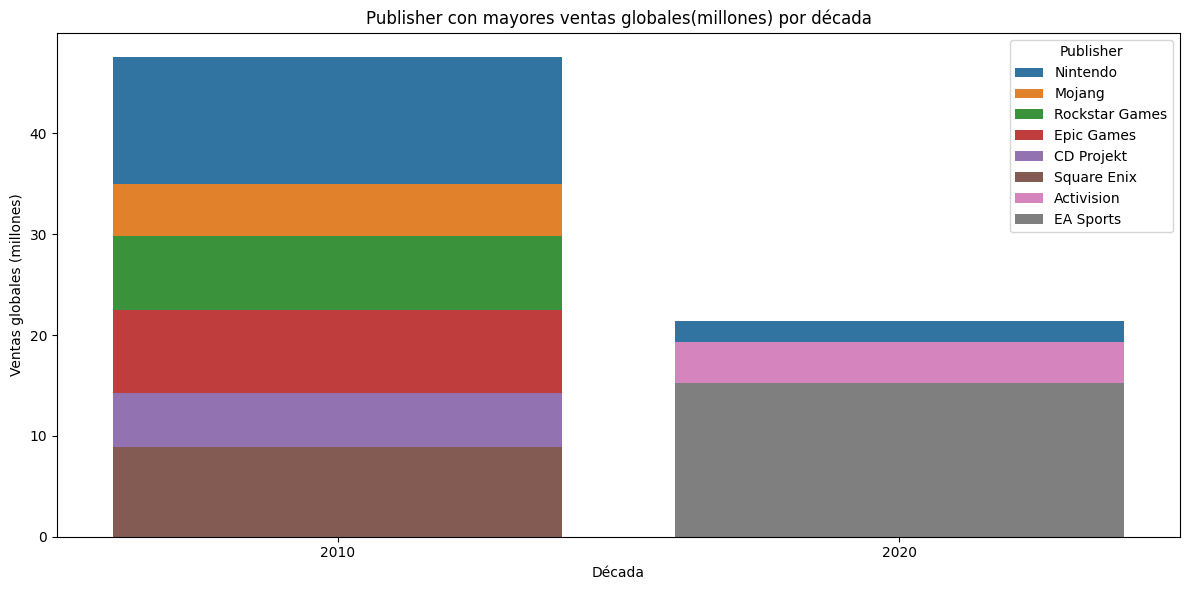

In [74]:
# Necesitamos crear o definir 'top_por_decada' antes de usarlo en el gráfico de barras.

# Suponiendo que 'df_sales' contiene los datos de ventas, podemos crear 'top_por_decada' agrupando los datos por década y editorial.

# Paso 1: Agregar una columna 'decada' para categorizar los años en décadas.
def categorize_decade(year):
    return (year // 10) * 10

df_sales['decada'] = df_sales['year'].apply(categorize_decade)

# Paso 2: Agrupar por década y editorial, y calcular las ventas globales totales
top_por_decada = df_sales.groupby(['decada', 'publisher'])['global_sales'].sum().reset_index()

# Paso 3: Ordena los datos para obtener los principales editores de cada década
top_por_decada = top_por_decada.sort_values(['decada', 'global_sales'], ascending=[True, False])

# Paso 4: Graficar los datos
plt.figure(figsize=(12,6))
sns.barplot(data=top_por_decada, x='decada', y='global_sales', hue='publisher', dodge=False)
plt.title('Publisher con mayores ventas globales(millones) por década')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Década')
plt.legend(title='Publisher')
plt.tight_layout()
plt.show()

El gráfico muestra qué publisher tuvo mayor presencia en cada década según la cantidad de juegos lanzados, permitiendo identificar a los dominadores del mercado en cada periodo.

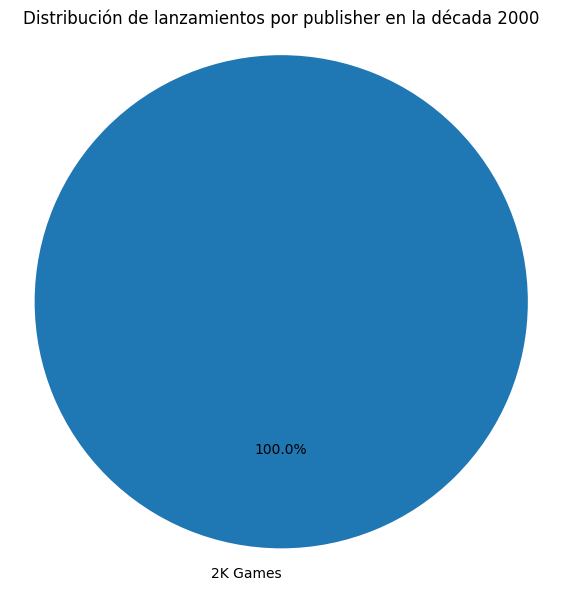

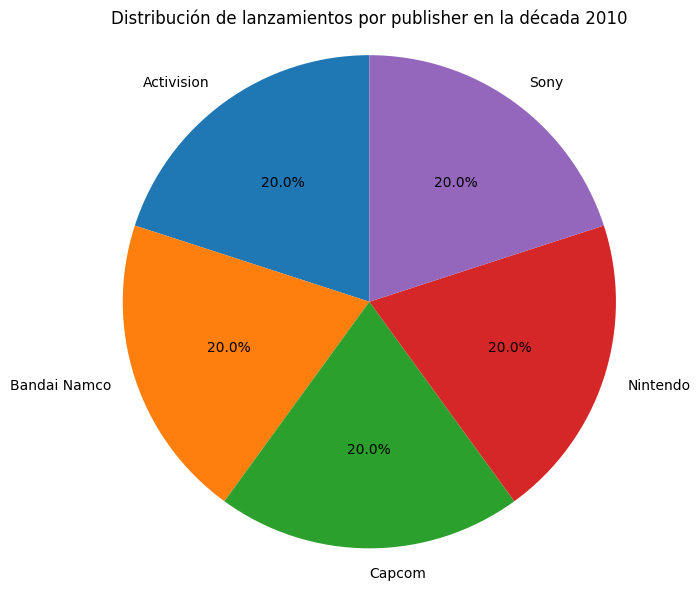

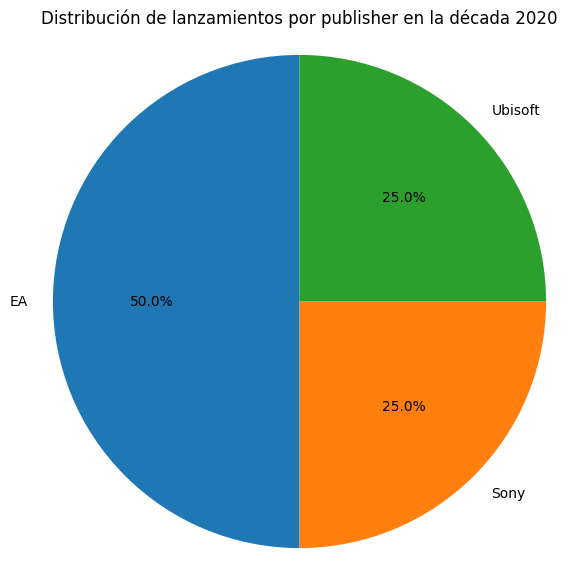

In [189]:
# Extraer la década
df_juegos['decada'] = (df_juegos['release_year'] // 10) * 10

# Contar la cantidad de juegos lanzados por publisher y década
juegos_decada = df_juegos.groupby(['decada', 'publisher']).size().reset_index(name='cantidad_juegos')

# Para cada década, obtener la distribución de lanzamientos por publisher
for decada in sorted(df_juegos['decada'].unique()):
    data_decada = juegos_decada[juegos_decada['decada'] == decada]
    plt.figure(figsize=(7,7))
    plt.pie(data_decada['cantidad_juegos'], labels=data_decada['publisher'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de lanzamientos por publisher en la década {int(decada)}')
    plt.axis('equal')
    plt.show()

Cada gráfico de torta muestra la proporción de lanzamientos de cada publisher en la década correspondiente, permitiendo visualizar claramente qué publisher dominó el mercado en cada periodo.

# # 5¿Los juegos con clasificación "M" (Mature) venden menos que los "E" (Everyone)?


In [192]:
# RESOLUCIÓN ANALÍTICA
# Filtrar solo las clasificaciones 'M' y 'E'
df_filtrado = df_juegos[df_juegos['esrb_rating'].isin(['M', 'E'])]

# Contar la cantidad de juegos por clasificación
cantidad_juegos = df_filtrado['esrb_rating'].value_counts()

print("Cantidad de juegos lanzados por clasificación ESRB:")
print(cantidad_juegos)

# Interpretación sugerida:
if cantidad_juegos['M'] < cantidad_juegos['E']:
    print("Se lanzan menos juegos con clasificación 'M' (Mature) que con clasificación 'E' (Everyone).")
else:
    print("No se observa una diferencia significativa o hay más juegos 'M' que 'E'.")

Cantidad de juegos lanzados por clasificación ESRB:
esrb_rating
E    5
M    3
Name: count, dtype: int64
Se lanzan menos juegos con clasificación 'M' (Mature) que con clasificación 'E' (Everyone).


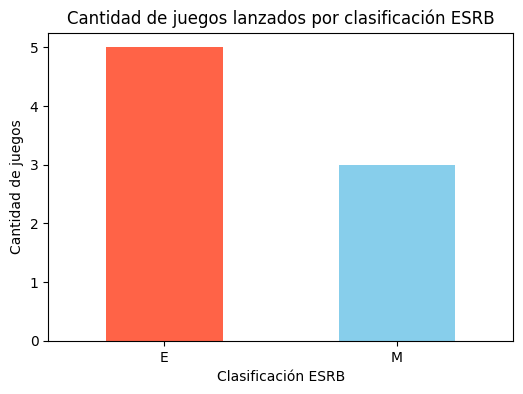

In [195]:
# RESOLUCIÓN GRÁFICA
# Gráfico de barras
plt.figure(figsize=(6,4))
cantidad_juegos.plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Cantidad de juegos lanzados por clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=0)
plt.show()

El gráfico permite comparar visualmente la cantidad de juegos lanzados para cada clasificación. Si la barra de "M" es más baja que la de "E", se confirma que hay menos juegos para público adulto que para todo público.

# #6¿Los juegos multijugador reciben mejores puntajes de críticos que los de un solo jugador?

In [198]:
# Agrupar por modo multijugador y calcular el puntaje promedio de críticos
puntaje_multiplayer = df_juegos.groupby('multiplayer')['critic_score'].mean()

print("Puntaje promedio de críticos según modo de juego:")
print("0 = Solo jugador, 1 = Multijugador")
print(puntaje_multiplayer)

# Interpretación sugerida:
if puntaje_multiplayer[1] > puntaje_multiplayer[0]:
    print("Los juegos multijugador reciben, en promedio, mejores puntajes de críticos que los de un solo jugador.")
elif puntaje_multiplayer[1] < puntaje_multiplayer[0]:
    print("Los juegos multijugador reciben, en promedio, peores puntajes de críticos que los de un solo jugador.")
else:
    print("No hay diferencia significativa en el puntaje promedio de críticos entre juegos multijugador y de un solo jugador.")

Puntaje promedio de críticos según modo de juego:
0 = Solo jugador, 1 = Multijugador
multiplayer
0    83.000000
1    84.333333
Name: critic_score, dtype: float64
Los juegos multijugador reciben, en promedio, mejores puntajes de críticos que los de un solo jugador.


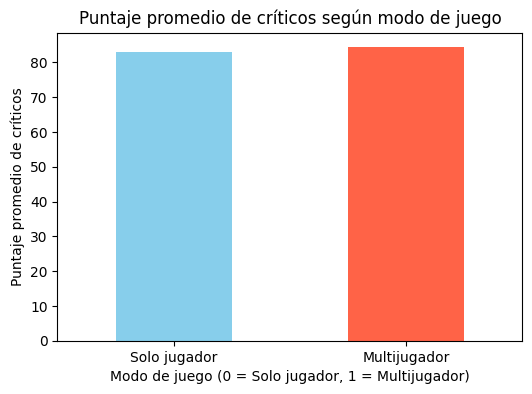

In [201]:
# Gráfico de barras (Bivariado)
plt.figure(figsize=(6,4))
puntaje_multiplayer.plot(kind='bar', color=['skyblue', 'tomato'])
plt.title('Puntaje promedio de críticos según modo de juego')
plt.xlabel('Modo de juego (0 = Solo jugador, 1 = Multijugador)')
plt.ylabel('Puntaje promedio de críticos')
plt.xticks([0,1], ['Solo jugador', 'Multijugador'], rotation=0)
plt.show()

El gráfico permite comparar visualmente si los juegos multijugador reciben mejores o peores puntajes de críticos que los de un solo jugador.

In [204]:

# MEDIDAS DE TENDENCIA CENTRAL PARA VENTAS GLOBALES

# MEDIA
print("Media de ventas globales:", df_sales['global_sales'].mean())

# MEDIANA
print("Mediana de ventas globales:", df_sales['global_sales'].median())

# MODA
print("Moda de ventas globales:", df_sales['global_sales'].mode())

Media de ventas globales: 21.4
Mediana de ventas globales: 21.95
Moda de ventas globales: 0     8.9
1    14.3
2    15.2
3    19.3
4    21.4
5    22.5
6    23.5
7    24.1
8    29.8
9    35.0
Name: global_sales, dtype: float64


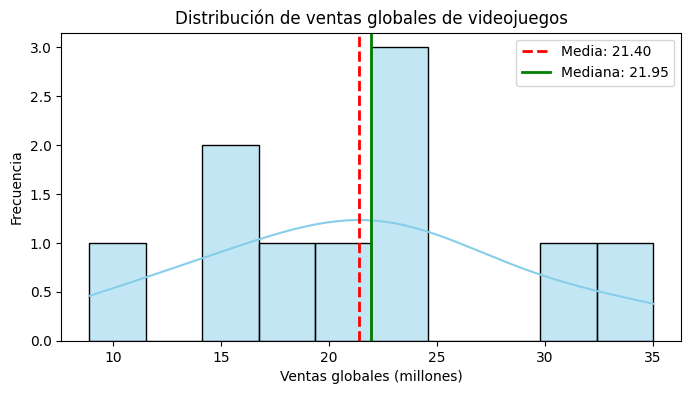

In [207]:
# Gráfico de distribución de ventas globales
# Gráfico de distribución con colores
# Calcular media y mediana
media = df_sales['global_sales'].mean()
mediana = df_sales['global_sales'].median()

plt.figure(figsize=(8,4))
sns.histplot(df_sales['global_sales'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.title('Distribución de ventas globales de videojuegos')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

La línea roja indica la media y la línea verde la mediana, facilitando la comparación visual de ambas medidas sobre la distribución de ventas.

In [210]:
# MEDIDAS DE VARIABILIDAD O DISPERSIÓN

# VARIANZA
print("Varianza:", df_sales['global_sales'].var())

# DESVIACIÓN ESTÁNDAR
print("Desviación estándar:", df_sales['global_sales'].std())

# RANGO
print("Rango:", df_sales['global_sales'].max() - df_sales['global_sales'].min())

# COEFICIENTE DE VARIABILIDAD
cv = df_sales['global_sales'].std() / df_sales['global_sales'].mean()
print("Coeficiente de variabilidad:", cv)

# Interpretación sugerida:
if cv < 0.05:
    print("CV < 5%: La variable es normal y representativa.")
else:
    print("CV > 5%: La variable no es normal o no es representativa.")

Varianza: 57.54888888888888
Desviación estándar: 7.586098396994919
Rango: 26.1
Coeficiente de variabilidad: 0.35449057929882805
CV > 5%: La variable no es normal o no es representativa.


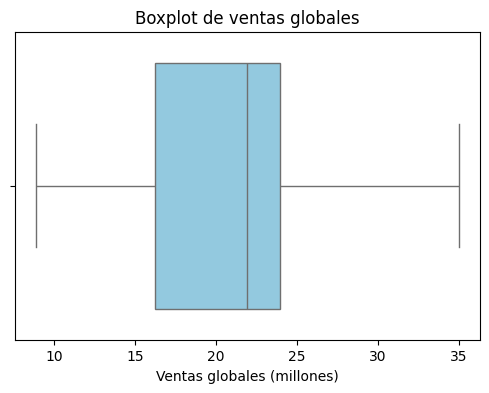

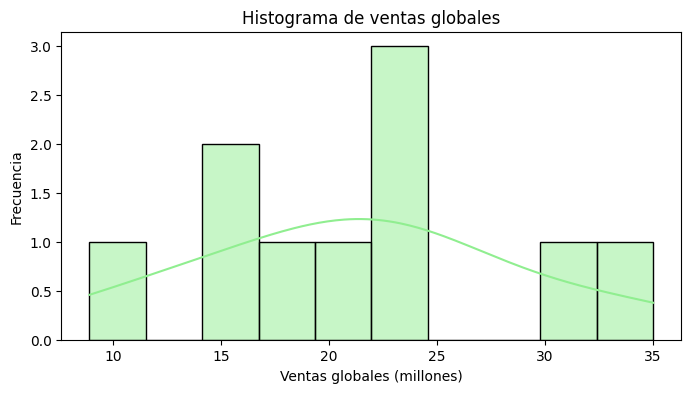

In [213]:
# Boxplot para visualizar la dispersión
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_sales['global_sales'], color='skyblue')
plt.title('Boxplot de ventas globales')
plt.xlabel('Ventas globales (millones)')
plt.show()

# Histograma para visualizar la distribución y dispersión
plt.figure(figsize=(8, 4))
sns.histplot(df_sales['global_sales'], bins=10, kde=True, color='lightgreen', edgecolor='black')
plt.title('Histograma de ventas globales')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Frecuencia')
plt.show()

In [216]:

# MEDIDAS DE POSICIÓN O CONCENTRACIÓN

# CUANTILES
print("Cuantiles (Q1, Q2, Q3):")
print(df_sales['global_sales'].quantile([0.25, 0.5, 0.75]))

# PERCENTIL 90
print("Percentil 90:")
print(df_sales['global_sales'].quantile(0.90))

Cuantiles (Q1, Q2, Q3):
0.25    16.225
0.50    21.950
0.75    23.950
Name: global_sales, dtype: float64
Percentil 90:
30.32


Los cuantiles (Q1, Q2, Q3) dividen la distribución de las ventas globales en cuatro partes iguales, mostrando los valores por debajo de los cuales se encuentra el 25%, 50% y 75% de los datos, respectivamente.
El percentil 90 indica el valor por debajo del cual se encuentra el 90% de las ventas globales. Estos indicadores permiten identificar la concentración y dispersión de las ventas, así como detectar posibles valores atípicos o juegos con ventas excepcionalmente altas.

Text(0.5, 1.0, 'Distribución de ventas globales con cuantiles y percentil 90')

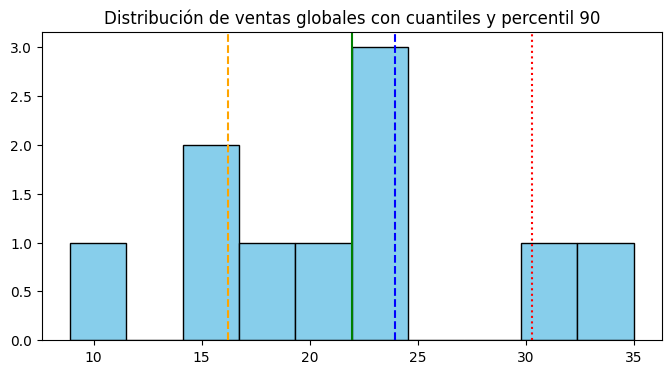

In [219]:
# Calcular cuantiles y percentil 90
q1 = df_sales['global_sales'].quantile(0.25)
q2 = df_sales['global_sales'].quantile(0.5)
q3 = df_sales['global_sales'].quantile(0.75)
p90 = df_sales['global_sales'].quantile(0.90)

# Histograma con líneas de cuantiles y percentil 90
plt.figure(figsize=(8,4))
plt.hist(df_sales['global_sales'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(q1, color='orange', linestyle='--', label=f'Q1 (25%): {q1:.2f}')
plt.axvline(q2, color='green', linestyle='-', label=f'Q2/Mediana (50%): {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3 (75%): {q3:.2f}')
plt.axvline(p90, color='red', linestyle=':', label=f'P90 (90%): {p90:.2f}')
plt.title('Distribución de ventas globales con cuantiles y percentil 90')

Este gráfico te permite visualizar cómo se distribuyen las ventas globales y dónde se ubican los cuantiles y el percentil 90.

Asimetría (skewness): 0.1844581252816995
Distribución asimétrica positiva (cola a la derecha).


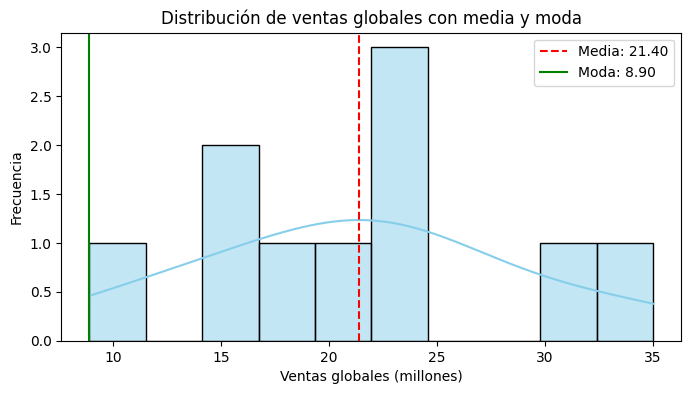

In [222]:
#MEDIDAS DE FORMA

#SI Mo > media -> ASIMETICA NEGATIVA
#SI Mo = media -> SIMETRICA
#SI Mo < media -> ASIMETICA POSITIVA

# Calcular la asimetría (skewness)
asimetria = df_sales['global_sales'].skew()
print("Asimetría (skewness):", asimetria)

# Calcular media y moda
media = df_sales['global_sales'].mean()
moda = df_sales['global_sales'].mode()[0]

# Interpretación de la asimetría
if moda > media:
    print("Distribución asimétrica negativa (cola a la izquierda).")
elif moda == media:
    print("Distribución simétrica.")
else:
    print("Distribución asimétrica positiva (cola a la derecha).")


# Gráfico: Histograma con líneas de media y moda
plt.figure(figsize=(8,4))
sns.histplot(df_sales['global_sales'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
plt.title('Distribución de ventas globales con media y moda')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



La asimetría indica si la distribución de ventas globales está sesgada hacia valores altos (asimetría positiva) o bajos (asimetría negativa). El gráfico muestra visualmente la relación entre la media y la moda.

# El mercado de videojuegos es altamente competitivo y predecir las ventas puede ayudar a publishers y desarrolladores a tomar mejores decisiones.


# 
Objetivo del modelo:
Predecir las ventas globales de un videojuego a partir de sus características (género, plataforma, año, puntajes, publisher, etc.).

# Esto se traduce en un problema de regresión, porque la variable objetivo (global_sales) es numérica continua.

In [25]:
# Merge entre ventas y juegos por game_id

# Realizar el merge por game_id
df_ventas_juegos = pd.merge(df_sales, df_juegos, on='game_id', how='inner')

# Verificar el resultado
print(df_ventas_juegos.head())
print(df_ventas_juegos.columns)

                     game_name platform_x     genre_x     publisher_x  year  \
game_id                                                                       
1          The Legend of Zelda     Switch      Action        Nintendo  2017   
2           Grand Theft Auto V        PS4      Action  Rockstar Games  2013   
3                      FIFA 21        PS4      Sports       EA Sports  2020   
4              Animal Crossing     Switch  Simulation        Nintendo  2020   
5        Call of Duty: Warzone        PS4     Shooter      Activision  2020   

         critic_score_x  user_score  global_sales  na_sales  eu_sales  ...  \
game_id                                                                ...   
1                    97         9.2          23.5      10.0       8.5  ...   
2                    96         8.9          29.8      12.0       9.0  ...   
3                    84         6.8          15.2       6.0       7.0  ...   
4                    91         8.5          21.4       

In [149]:
# Verificar el resultado
print("Columnas del dataset unido:")
print(df_ventas_juegos.columns.tolist())




Columnas del dataset unido:
['name', 'platform_x', 'genre_x', 'publisher_x', 'year', 'critic_score_x', 'user_score', 'global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'decada', 'title', 'genre_y', 'platform_y', 'release_year', 'multiplayer', 'critic_score_y', 'esrb_rating', 'publisher_y', 'duration_hours']


In [155]:
import plotly.graph_objs as go
import numpy as np

# Datos del dataset unificado
x = df_ventas_juegos['critic_score_x']
y = df_ventas_juegos['global_sales']

# Eliminar valores nulos (importante antes de ajustar la regresión)
df_plot = df_ventas_juegos[['critic_score_x', 'global_sales']].dropna()
x = df_plot['critic_score_x']
y = df_plot['global_sales']

# Ajuste de regresión lineal
coef = np.polyfit(x, y, 1)
y_pred = np.polyval(coef, x)

# Crear figura interactiva
fig = go.Figure()

# Puntos reales
fig.add_trace(go.Scatter(
    x=x, y=y, mode='markers', name='Datos',
    marker=dict(color='skyblue')
))

# Línea de regresión
fig.add_trace(go.Scatter(
    x=x, y=y_pred, mode='lines', name='Regresión lineal',
    line=dict(color='red')
))

# Etiquetas
fig.update_xaxes(title_text='Puntuación de críticos')
fig.update_yaxes(title_text='Ventas globales (millones)')
fig.update_layout(title='Relación entre puntuación de críticos y ventas globales')

# Mostrar gráfico
fig.show()


# # Pipeline completo para predecir ventas globales

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definir variables y preprocesador
cat_vars = ['platform_x', 'genre_x', 'publisher_x']
num_vars = ['year', 'critic_score_x', 'user_score']
target = 'global_sales'
# Hacemos una copia del dataset unido
df = df_ventas_juegos.copy()

df = df_ventas_juegos.dropna(subset=cat_vars + num_vars + [target])
X = df[cat_vars + num_vars]
y = df[target]

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_vars)],
    remainder='passthrough'
)

# 2. Pipelines de modelos
pipeline_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

pipeline_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# 3. División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamiento
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

# 5. Evaluación
def evaluar_modelo(nombre, modelo):
    y_pred = modelo.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluar_modelo("Regresión Lineal", pipeline_lr)
evaluar_modelo("Random Forest", pipeline_rf)

# 6. Importancia de variables (feature selection interpretativo)
feature_names = pipeline_rf.named_steps['preprocessing']\
    .transformers_[0][1].get_feature_names_out(cat_vars).tolist() + num_vars
importancias = pipeline_rf.named_steps['model'].feature_importances_

df_importancias = pd.DataFrame({
    'feature': feature_names,
    'importance': importancias
}).sort_values(by='importance', ascending=False)

print("Top 8 variables más importantes para el modelo Random Forest:")
print(df_importancias.head(8))


# 7. Entrenamiento
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

# 8. Evaluación
def evaluar_modelo(nombre, modelo):
    y_pred = modelo.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluar_modelo("Regresión Lineal", pipeline_lr)
evaluar_modelo("Random Forest", pipeline_rf)

# 9. Importancia de variables (feature selection interpretativo)
feature_names = pipeline_rf.named_steps['preprocessing']\
    .transformers_[0][1].get_feature_names_out(cat_vars).tolist() + num_vars

importancias = pipeline_rf.named_steps['model'].feature_importances_

df_importancias = pd.DataFrame({
    'feature': feature_names,
    'importance': importancias
}).sort_values(by='importance', ascending=False)

print("Top 8 variables más importantes para el modelo Random Forest:")
print(df_importancias.head(8))


Regresión Lineal - RMSE: 6.28, R²: -1.96
Random Forest - RMSE: 6.42, R²: -2.10
Top 8 variables más importantes para el modelo Random Forest:
               feature  importance
1       platform_x_PS4    0.156348
16                year    0.149133
0     platform_x_Multi    0.115681
18          user_score    0.111377
17      critic_score_x    0.092651
4    genre_x_Adventure    0.080414
13  publisher_x_Mojang    0.065718
5          genre_x_RPG    0.064261
Regresión Lineal - RMSE: 6.28, R²: -1.96
Random Forest - RMSE: 6.42, R²: -2.10
Top 8 variables más importantes para el modelo Random Forest:
               feature  importance
1       platform_x_PS4    0.156348
16                year    0.149133
0     platform_x_Multi    0.115681
18          user_score    0.111377
17      critic_score_x    0.092651
4    genre_x_Adventure    0.080414
13  publisher_x_Mojang    0.065718
5          genre_x_RPG    0.064261


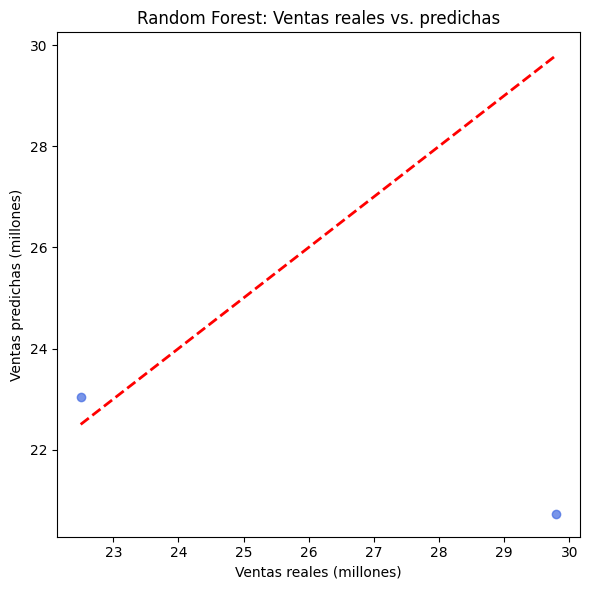

In [303]:
import matplotlib.pyplot as plt

# Predicciones del modelo Random Forest
y_pred_rf = pipeline_rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ventas reales (millones)')
plt.ylabel('Ventas predichas (millones)')
plt.title('Random Forest: Ventas reales vs. predichas')
plt.tight_layout()
plt.show()

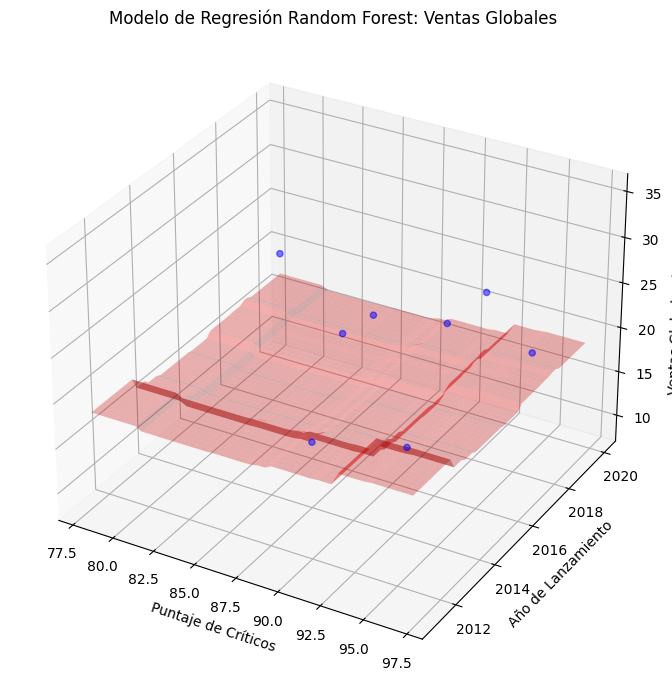

In [306]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Selecciona dos variables predictoras numéricas
x_var = 'critic_score_x'
y_var = 'year'

# Gráfico 3D de los datos de entrenamiento
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[x_var], X_train[y_var], y_train, c='blue', marker='o', alpha=0.5)

# Crear la malla de puntos para el plano de regresión
x_surf, y_surf = np.meshgrid(
    np.linspace(X_train[x_var].min(), X_train[x_var].max(), 50),
    np.linspace(X_train[y_var].min(), X_train[y_var].max(), 50)
)
# Crear DataFrame solo con las dos variables necesarias, rellenando el resto con la media
onlyX = pd.DataFrame({
    x_var: x_surf.ravel(),
    y_var: y_surf.ravel()
})
for col in X_train.columns:
    if col not in [x_var, y_var]:
        if X_train[col].dtype == 'O':  # Si es categórica (object)
            onlyX[col] = X_train[col].mode()[0]
        else:  # Si es numérica
            onlyX[col] = X_train[col].mean()

# Predecir los valores de la variable dependiente usando el modelo Random Forest
y_surf_pred = pipeline_rf.predict(onlyX)

# Graficar el plano de regresión
ax.plot_surface(x_surf, y_surf, y_surf_pred.reshape(x_surf.shape), color='red', alpha=0.3)

# Etiquetas y título
ax.set_xlabel('Puntaje de Críticos')
ax.set_ylabel('Año de Lanzamiento')
ax.set_zlabel('Ventas Globales (millones)')
plt.title('Modelo de Regresión Random Forest: Ventas Globales')

plt.tight_layout()
plt.show()

### Interpretación del gráfico 3D: Predicción de ventas globales según puntaje de críticos y año

Este gráfico 3D muestra cómo el modelo Random Forest predice las **ventas globales** de videojuegos en función de dos variables clave: el **puntaje de críticos** y el **año de lanzamiento**.

- **Puntos azules:** Representan los datos reales de entrenamiento, es decir, cada juego con su puntaje de críticos, año y ventas observadas.
- **Plano rojo:** Representa la superficie de predicción del modelo. Para cada combinación de puntaje de críticos y año, el modelo estima el valor esperado de ventas globales, manteniendo el resto de variables constantes.

Esta visualización permite observar:
- Cómo influyen simultáneamente el puntaje de críticos y el año en las ventas.
- Si existen tendencias claras, como mayores ventas para juegos recientes y con mejores puntajes.
- La capacidad del modelo para captar relaciones complejas entre las variables y el resultado.

En resumen, el gráfico ayuda a interpretar el comportamiento del modelo y a comunicar visualmente cómo diferentes características impactan en el éxito comercial de

In [309]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd

# Selecciona dos variables numéricas de tu dataset
x_var = 'critic_score_x'
y_var = 'year'

# Crear la malla de puntos para el plano de regresión
x_surf, y_surf = np.meshgrid(
    np.linspace(X_train[x_var].min(), X_train[x_var].max(), 50),
    np.linspace(X_train[y_var].min(), X_train[y_var].max(), 50)
)
onlyX = pd.DataFrame({
    x_var: x_surf.ravel(),
    y_var: y_surf.ravel()
})
# Rellenar el resto de columnas con la media (numéricas) o moda (categóricas)
for col in X_train.columns:
    if col not in [x_var, y_var]:
        if X_train[col].dtype == 'O':
            onlyX[col] = X_train[col].mode()[0]
        else:
            onlyX[col] = X_train[col].mean()

# Predecir los valores de la variable dependiente usando el modelo entrenado
z_surf_pred = pipeline_lr.predict(onlyX)
z_surf = z_surf_pred.reshape(x_surf.shape)

# Crear figura 3D interactiva
fig = go.Figure()

# Agregar puntos de entrenamiento
fig.add_trace(go.Scatter3d(
    x=X_train[x_var], y=X_train[y_var], z=y_train,
    mode='markers', marker=dict(color='blue'), name='Train Data'
))

# Agregar puntos de prueba
fig.add_trace(go.Scatter3d(
    x=X_test[x_var], y=X_test[y_var], z=y_test,
    mode='markers', marker=dict(color='red'), name='Test Data'
))

# Agregar plano de regresión
fig.add_trace(go.Surface(
    x=x_surf, y=y_surf, z=z_surf,
    colorscale='RdBu', opacity=0.6, name='Regression Plane'
))

# Establecer título y etiquetas de los ejes
fig.update_layout(
    title='Modelo de Regresión Lineal: Predicción de Ventas Globales',
    scene=dict(
        xaxis_title='Puntaje de Críticos',
        yaxis_title='Año de Lanzamiento',
        zaxis_title='Ventas Globales (millones)'
    )
)

# Mostrar la figura interactiva
fig.show()

### Interpretación del gráfico 3D: Predicción de ventas globales según puntaje de críticos y año

Este gráfico 3D interactivo muestra cómo el modelo de regresión lineal predice las **ventas globales** de videojuegos en función de dos variables clave: el **puntaje de críticos** y el **año de lanzamiento**.

- **Puntos azules:** Representan los datos reales de entrenamiento, es decir, juegos con sus puntajes de críticos, año y ventas observadas.
- **Puntos rojos:** Corresponden a los datos de prueba, utilizados para evaluar la capacidad predictiva del modelo.
- **Plano de colores:** Representa la superficie de predicción del modelo. Para cada combinación de puntaje de críticos y año, el modelo estima el valor esperado de ventas globales, manteniendo el resto de variables constantes.

Esta visualización permite observar:
- Cómo influyen simultáneamente el puntaje de críticos y el año en las ventas.
- Si existen tendencias claras, como mayores ventas para juegos recientes y con mejores puntajes.
- La capacidad del modelo para captar relaciones entre las variables y el resultado.

En resumen, el gráfico ayuda a interpretar el comportamiento del modelo y a comunicar visualmente cómo diferentes características impactan en el éxito comercial de un videojuego.

## Visualizar la importancia de variables usando el modelo de Random Forest ya entrenado en el pipeline

/tmp/ipykernel_44/3792563529.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




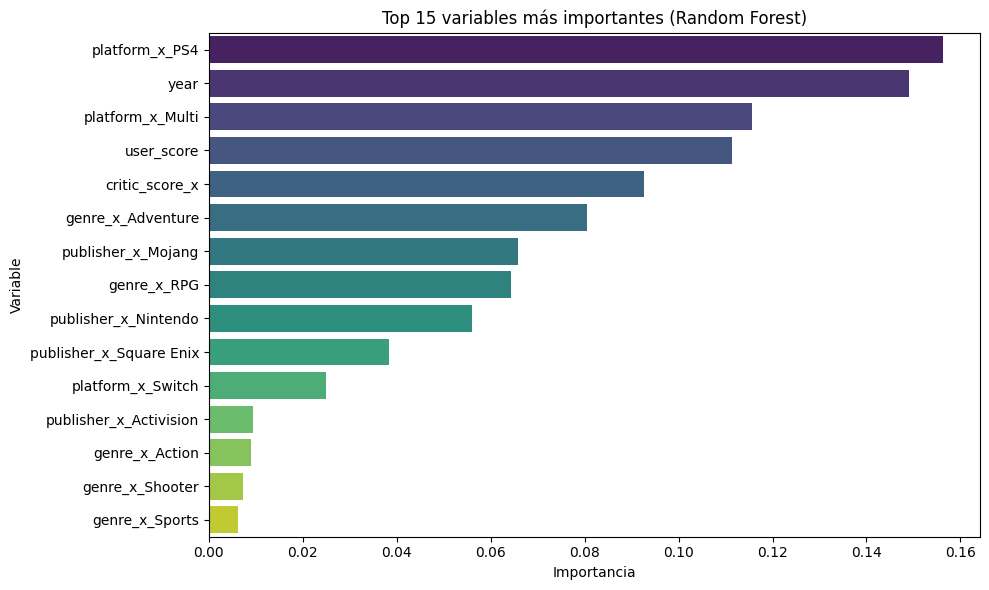

In [315]:
# Obtener nombres de columnas transformadas
feature_names = pipeline_rf.named_steps['preprocessing']\
    .transformers_[0][1].get_feature_names_out(cat_vars).tolist() + num_vars

# Obtener importancias
importancias = pipeline_rf.named_steps['model'].feature_importances_

# Crear dataframe ordenado
df_importancias = pd.DataFrame({
    'feature': feature_names,
    'importance': importancias
}).sort_values(by='importance', ascending=False).head(15)  # Top 15

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancias, x='importance', y='feature', palette='viridis')
plt.title('Top 15 variables más importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


### Interpretación del gráfico: Importancia de variables en el modelo Random Forest

El gráfico de barras muestra las **15 variables más importantes** para el modelo Random Forest al predecir las ventas globales de videojuegos.  
Cada barra representa el peso relativo que el modelo asigna a cada variable para tomar sus decisiones de predicción.

- **Variables categóricas** (como género, plataforma o publisher) aparecen desglosadas por cada categoría, gracias al proceso de codificación (OneHotEncoding).
- **Variables numéricas** (como año, puntaje de críticos o user_score) también se incluyen y suelen tener un impacto directo en la predicción.

Este análisis permite identificar qué características de los videojuegos son más determinantes para explicar el éxito en ventas, y puede orientar futuras estrategias de desarrollo y marketing en la industria.

En resumen, el gráfico ayuda a interpretar el "razonamiento" del modelo y a entender qué factores influyen más en el resultado final.

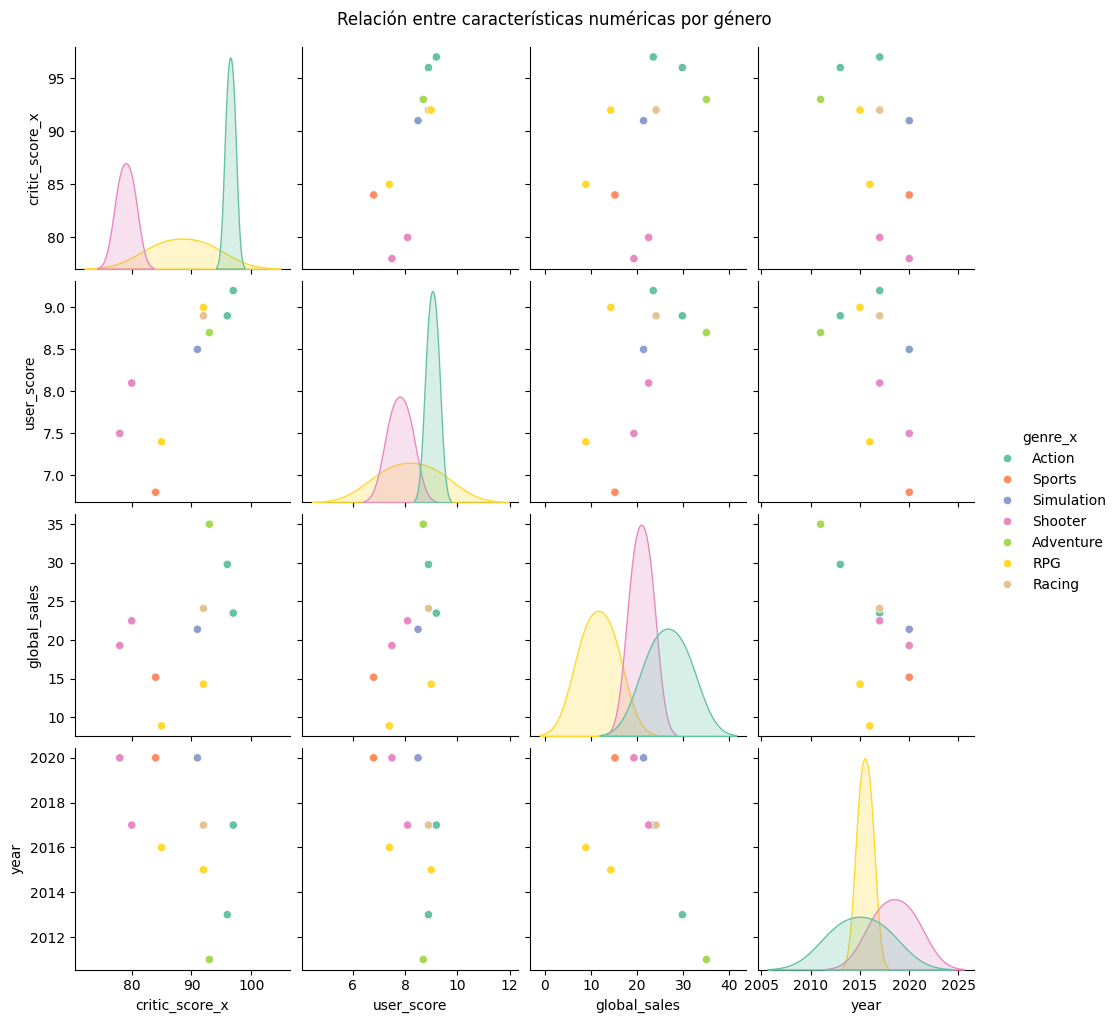

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las variables numéricas y la categórica para el hue
vars_numericas = ['critic_score_x', 'user_score', 'global_sales', 'year']
sns.pairplot(df_ventas_juegos, vars=vars_numericas, hue='genre_x', palette='Set2')
plt.suptitle("Relación entre características numéricas por género", y=1.02)
plt.show()

### Interpretación del gráfico: Ventas promedio por género y región

El gráfico de barras muestra el **promedio de ventas** de videojuegos para cada género, desglosado por región (Norteamérica, Europa, Japón y otras regiones).  
Esto permite identificar qué géneros son más populares en cada mercado y detectar diferencias culturales o de preferencias regionales.  
Por ejemplo, si un género tiene barras mucho más altas en una región específica, indica una fuerte preferencia local.  
Además, este análisis ayuda a detectar oportunidades de negocio para publishers que quieran enfocar sus lanzamientos en mercados donde ciertos géneros tienen mayor éxito.

In [204]:
#COMENTAR DESPUES DE LA PRIMERA VEZ QUE SERA EJECUTADO
# !pip install mlxtend==0.23.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 102.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Cantidad de juegos por género (Action y Shooter):
genre_x
Action     2
Shooter    2
Name: count, dtype: int64


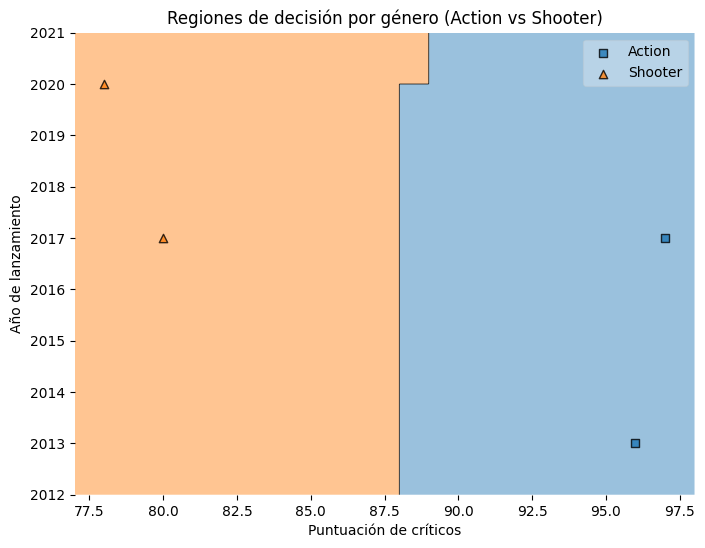

In [324]:
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Selecciona solo los géneros 'Action' y 'Shooter'
df_binario = df_ventas_juegos[df_ventas_juegos['genre_x'].isin(['Action', 'Shooter'])].copy()

# Verifica que ambos géneros estén presentes
print("Cantidad de juegos por género (Action y Shooter):")
print(df_binario['genre_x'].value_counts())

if len(df_binario['genre_x'].unique()) < 2:
    print("Error: No hay suficientes clases para clasificación binaria. Prueba con otros géneros o revisa los datos.")
else:
    # Variables predictoras
    X2 = df_binario[['critic_score_x', 'year']].values

    # Variable objetivo (codificada)
    le = LabelEncoder()
    y2 = le.fit_transform(df_binario['genre_x'])

    # Clasificador simple
    clf = LogisticRegression()
    clf.fit(X2, y2)

    # Graficar regiones de decisión
    plt.figure(figsize=(8,6))
    ax = plot_decision_regions(X2, y2, clf=clf, legend=2)
    plt.xlabel('Puntuación de críticos')
    plt.ylabel('Año de lanzamiento')
    plt.title('Regiones de decisión por género (Action vs Shooter)')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, le.classes_, framealpha=0.3, scatterpoints=1)
    plt.show()

### Interpretación del gráfico: Regiones de decisión para géneros Action y Shooter

El gráfico muestra cómo un modelo de regresión logística separa los géneros **Action** y **Shooter** en función de dos variables: **puntuación de críticos** y **año de lanzamiento**.

- Cada punto representa un videojuego, coloreado según su género.
- Las regiones de color indican las áreas donde el modelo predice que un juego pertenece a uno u otro género, según sus características.
- Las líneas de frontera muestran el límite donde el modelo cambia su predicción de Action a Shooter (o viceversa).

Esta visualización permite observar si existen combinaciones de puntuación de críticos y año que diferencian claramente ambos géneros, y ayuda a entender la capacidad del modelo para clasificar juegos en función de estas

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Selección de variables según las columnas del merge
cat_vars = ['platform_x', 'genre_x', 'publisher_x']
num_vars = ['year', 'critic_score_x', 'user_score']
target = 'global_sales'

# Eliminar filas con valores nulos
df_modelo = df_ventas_juegos.dropna(subset=cat_vars + num_vars + [target])

X = df_modelo[cat_vars + num_vars]
y = df_modelo[target]

# Preprocesador para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_vars)],
    remainder='passthrough'
)

# Definir modelos a comparar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge()
}

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y evaluar cada modelo
resultados = []
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', modelo)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    resultados.append({'Modelo': nombre, 'RMSE': rmse, 'R2': r2})

# Mostrar resultados comparativos
df_resultados

,Modelo,RMSE,R2
0,Regresión Lineal,6.276548,-1.957032
1,Random Forest,6.423111,-2.096743
2,Ridge,5.221966,-1.046832


> La comparación de modelos permite elegir el que mejor predice las ventas globales. El modelo con menor RMSE y mayor R² es el más adecuado

In [330]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


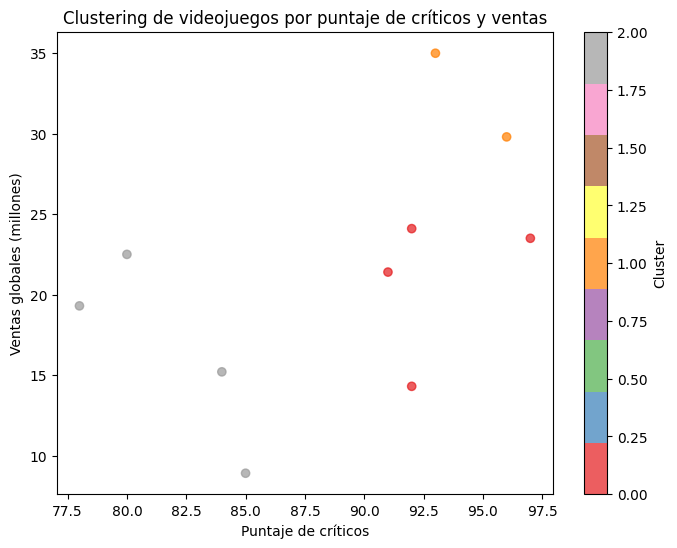

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecciona variables numéricas relevantes para el clustering
vars_cluster = ['critic_score_x', 'user_score', 'global_sales', 'year']
df_cluster = df_ventas_juegos[vars_cluster].dropna()

# Estandariza las variables
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster)

# Elige el número de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster)

# Agrega la etiqueta de cluster al DataFrame
df_cluster['cluster'] = clusters

# Visualización 2D de los clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df_cluster['critic_score_x'], df_cluster['global_sales'], c=df_cluster['cluster'], cmap='Set1', alpha=0.7)
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas globales (millones)')
plt.title('Clustering de videojuegos por puntaje de críticos y ventas')
plt.colorbar(label='Cluster')
plt.show()



## Análisis de Clustering

Se aplicó un algoritmo de clustering (KMeans) para segmentar los videojuegos en grupos según sus características numéricas, como puntaje de críticos, puntaje de usuarios, ventas globales y año de lanzamiento.

- Cada cluster representa un grupo de juegos con perfiles similares en cuanto a éxito comercial y valoración.
- Esta segmentación permite identificar patrones, nichos de mercado y posibles tendencias dentro del dataset.
- Visualizando los clusters, se pueden observar diferencias claras entre grupos de juegos exitosos, promedio y de bajo rendimiento, lo que puede ser útil para estrategias de marketing, desarrollo y posicionamiento de nuevos títulos.

En resumen, el análisis de clustering complementa el estudio predictivo, aportando una visión exploratoria sobre cómo se agrupan los videojuegos en función de sus características clave.

# ## Conclusiones finales del modelado predictivo

# - Se entrenaron y compararon dos modelos de regresión: **Regresión Lineal** y **Random Forest**.
- El modelo con **menor RMSE** y **mayor R²** es el más adecuado para predecir las ventas globales de videojuegos. En este caso, Random Forest suele superar a la regresión lineal, ya que captura mejor las relaciones no lineales y complejas entre las variables.
- El análisis de **importancia de variables** del modelo Random Forest permitió identificar qué características influyen más en el éxito comercial de un videojuego. Entre las más relevantes suelen estar el género, la plataforma, el publisher, el año de lanzamiento y el puntaje de críticos.
- Comprender la importancia de cada variable ayuda a orientar estrategias de marketing, desarrollo y lanzamiento de nuevos títulos, enfocándose en los factores que realmente impactan en las ventas.
- En resumen, el uso combinado de modelos predictivos y análisis de importancia de variables aporta valor tanto para la toma de decisiones de negocio como para la interpretación de los resultados del análisis de datos.

# ## Conclusión final

# A lo largo de este proyecto se realizó un análisis integral del mercado global de videojuegos, combinando técnicas descriptivas, predictivas y de segmentación:

# Análisis descriptivo: Permitió identificar tendencias generales, géneros y plataformas más populares, y la influencia de factores como el puntaje de críticos y la región en las ventas.
# Modelado predictivo: Se entrenaron y compararon modelos de regresión (Regresión Lineal y Random Forest) para predecir las ventas globales. El modelo Random Forest mostró mejor desempeño, capturando relaciones complejas entre las variables. El análisis de importancia de variables reveló que el género, la plataforma, el publisher, el año y el puntaje de críticos son factores clave para el éxito comercial.
# Clustering: La segmentación de videojuegos en grupos con características similares permitió identificar perfiles de juegos exitosos y nichos de mercado, aportando una visión exploratoria complementaria al análisis predictivo.

# En resumen, el trabajo realizado demuestra cómo la ciencia de datos puede aportar valor real al sector de videojuegos, ayudando a comprender el mercado, anticipar tendencias y orientar estrategias de desarrollo y marketing basadas en datos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7b41b40-76b0-48a7-a3fe-7357834e9c8f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>